# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


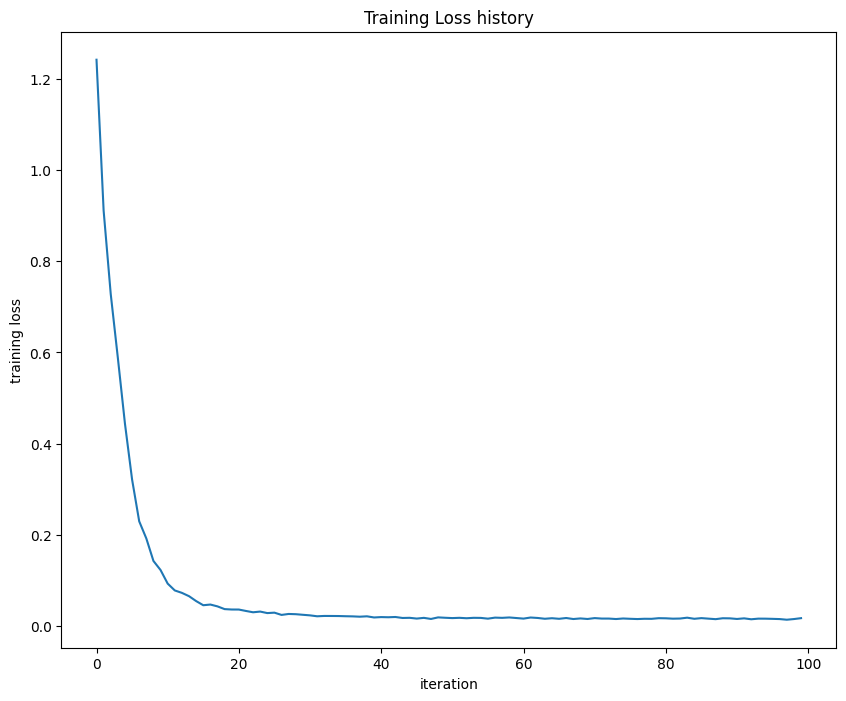

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [29]:
from importlib import reload
from scripts.classifiers import neural_net

# Перезагрузка модуля neural_net
reload(neural_net)

# Импорт функции neural_net после перезагрузки модуля
from scripts.classifiers.neural_net import TwoLayerNet

In [30]:
import os
import pickle
import numpy as np

# Путь к директории с данными CIFAR-10
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

# Функция для загрузки данных из файла
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data['data'], np.array(data['labels'])

# Загрузка обучающих данных
X_train = []
y_train = []
for i in range(1, 6):
    file_path = os.path.join(cifar10_dir, f'data_batch_{i}')
    data, labels = load_data(file_path)
    X_train.append(data)
    y_train.extend(labels)
X_train = np.concatenate(X_train)
y_train = np.array(y_train)

# Загрузка тестовых данных
file_path = os.path.join(cifar10_dir, 'test_batch')
X_test, y_test = load_data(file_path)

# Преобразование данных в нужный формат
X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')
X_test = X_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')

# Нормализация данных
X_train /= 255.0
X_test /= 255.0

# Вычитание среднего
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image

# Разделение тестовых данных на тестовую и валидационную выборки
X_val, X_test = X_test[:5000], X_test[5000:]
y_val, y_test = y_test[:5000], y_test[5000:]

In [31]:
# Изменение формы входных данных
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Обновление размера входных данных
input_size = X_train.shape[1]

num_classes = 10



# Создание и обучение модели
hidden_size = 200
num_iters = 20000

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
                  num_iters=num_iters, batch_size=500,
                  learning_rate=1e-3, learning_rate_decay=0.95,
                  reg=0.01, verbose=True)

# Оценка точности на валидационных данных
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 20000: loss 2.302616
iteration 100 / 20000: loss 2.302617
iteration 200 / 20000: loss 2.302618
iteration 300 / 20000: loss 2.302627
iteration 400 / 20000: loss 2.302604
iteration 500 / 20000: loss 2.302603
iteration 600 / 20000: loss 2.302617
iteration 700 / 20000: loss 2.302601
iteration 800 / 20000: loss 2.302632
iteration 900 / 20000: loss 2.302603
iteration 1000 / 20000: loss 2.302567
iteration 1100 / 20000: loss 2.302639
iteration 1200 / 20000: loss 2.302596
iteration 1300 / 20000: loss 2.302609
iteration 1400 / 20000: loss 2.302621
iteration 1500 / 20000: loss 2.302620
iteration 1600 / 20000: loss 2.302613
iteration 1700 / 20000: loss 2.302632
iteration 1800 / 20000: loss 2.302610
iteration 1900 / 20000: loss 2.302606
iteration 2000 / 20000: loss 2.302610
iteration 2100 / 20000: loss 2.302601
iteration 2200 / 20000: loss 2.302634
iteration 2300 / 20000: loss 2.302623
iteration 2400 / 20000: loss 2.302616
iteration 2500 / 20000: loss 2.302612
iteration 2600 / 20000: 

Параметры метода **train:**

*num_iters:* количество итераций обучения.

*batch_size:* размер мини-пакета для стохастического градиентного спуска.

*learning_rate:* скорость обучения для оптимизации.

*learning_rate_decay:* коэффициент уменьшения скорости обучения после каждой эпохи.

*reg:* коэффициент регуляризации для борьбы с переобучением.

*verbose:* если True, выводит информацию о процессе обучения.

Различные значения гиперпараметров, чтобы увеличить точность на валидационной выборке. Изменения могут включать:

Увеличение или уменьшение learning_rate.

Изменение reg для регуляризации.

Изменение num_iters и batch_size.

Добавление методов регуляризации, таких как Dropout или Batch Normalization.

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

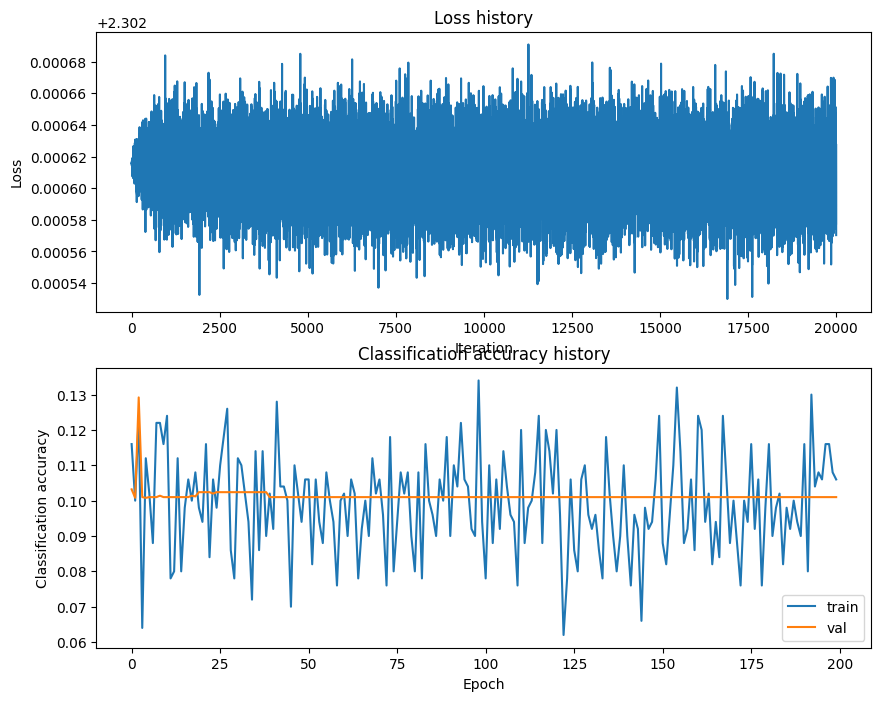

In [32]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

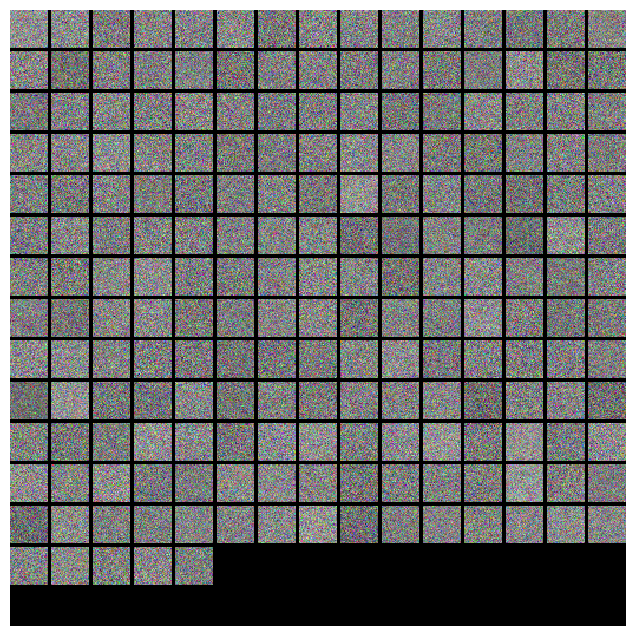

In [33]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 